<h2 style='color:blue' align='center'>Sports Celebrity Image Classification<h2>

In [16]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

<h3 style='color:purple'>(1) Preprocessing: Detect face and eyes</h3>

#### When we look at any image, most of the time we identify a person using a face. An image might contain multiple faces, also the face can be obstructed and not clear. The first step in our pre-processing pipeline is to detect faces from an image. Once face is detected, we will detect eyes, if two eyes are detected then only we keep that image otherwise discard it.</h4>

#### Now how do we detect face and eyes?

We will use haar cascade from opencv for this. Here is an article on this: https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html

In [17]:
img = cv2.imread('./test_images/sharapova1.jpg')
print(img.shape)
print(type(img))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #convert to RGB

(555, 700, 3)
<class 'numpy.ndarray'>


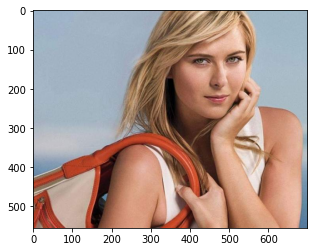

In [18]:
plt.imshow(img) #that uses matplotlib imshow so that we can show the pic here inline
# cv2.imshow("hi",img)

In [19]:
# img[:5,:5,:]
img[0,0,:] #1st pixel and its RGB values. if we hadnt convereted to RGB then we would see BGR values

array([157, 179, 200], dtype=uint8)

In [20]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert colour
print(gray.shape) #we drop the 3 arrays and keep only 1 by converting to b/w
print(gray[0,0])

(555, 700)
183


In [21]:
gray

array([[183, 183, 183, ..., 183, 182, 181],
       [183, 183, 183, ..., 184, 182, 181],
       [183, 183, 183, ..., 184, 183, 181],
       ...,
       [ 60,  62,  63, ..., 126, 126, 126],
       [ 64,  64,  65, ..., 126, 126, 126],
       [ 69,  66,  66, ..., 125, 125, 125]], dtype=uint8)

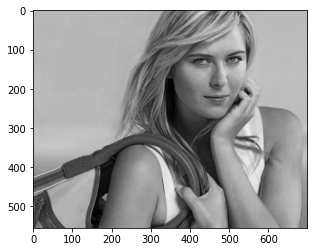

In [22]:
plt.imshow(gray, cmap='gray')

In [23]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
#'gray' is the image.

faces = face_cascade.detectMultiScale(gray, 1.3, 5) # double scaleFactor=1.3, int minNeighbors=5
faces 
#this 2Darray has only 1 array. that means it detected only 1 face
#x,y,width,height of the rectangle. x,y are the top left corner

array([[356,  37, 233, 233]])

In [24]:
(x,y,w,h) = faces[0]
x,y,w,h

(356, 37, 233, 233)

Lets draw a rectangle around the face to see what has been detected

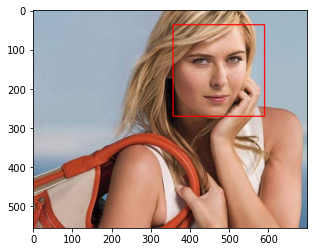

In [25]:
#cv2.rectange is used for drawing rectangle
#we give the 2 orner points of the rectange here
#255,0,0 says the colour of the rectange , here R=255, G=B=0. so red rectangle
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)  
#img is the original numpy 3D image
plt.imshow(face_img)

CODE FOR DRAWING EYES.

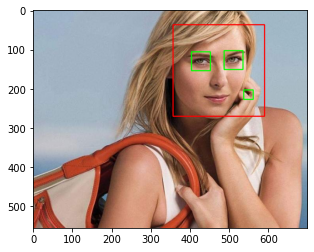

In [26]:
cv2.destroyAllWindows()
#opencv documentation has this code.
#we just iterate through the different face rectangels
#here we dont even need for loop because we will have only 1 face

for (x,y,w,h) in faces: 
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    #we just use the orignal 'img' array and then draw a face rectangle first
    #then we crop that rectangle which contains the face and create a new array
    #roi=region of interest
    roi_gray = gray[y:y+h, x:x+w]
    #roi_colour is just a pointer to that region
    #changes made here will be reflected in face_img
    roi_color = face_img[y:y+h, x:x+w]  
    eyes = eye_cascade.detectMultiScale(roi_gray) #find eyes in gray cropped image
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2) #GREEn colour
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

<h3 style='color:purple'>(2) Preprocessing: Crop the facial region of the image</h3>

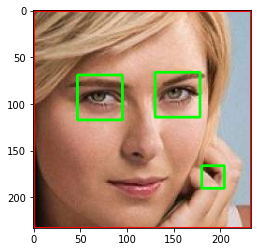

In [27]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')  
#this is what we need for our computation
#so we store this cropped portion later in our files

In [28]:
cropped_img = np.array(roi_color)
cropped_img.shape

(233, 233, 3)

**My custom function to perform face recognition**

In [29]:
#MY FUNCTION 
def disp_rect(input_img):
#     img = copy.deepcopy(input_img)
    img=np.copy(input_img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
#     gray=img
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)  
    for (x,y,w,h) in faces: 
        face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = face_img[y:y+h, x:x+w]  
        eyes = eye_cascade.detectMultiScale(roi_gray) 
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2) 
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

<h3 style='color:purple'>(3) Preprocessing: Use wavelet transform as a feature for traning our model</h3>

#### In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc

### Wavelet transform

In [30]:
import numpy as np
import pywt #gives us the wavelt transformation
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

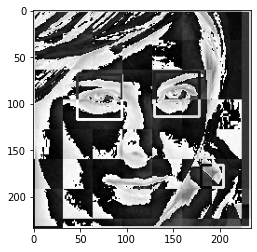

In [31]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

#### We can see above a wavelet transformed image that gives clues on facial features such as eyes, nose, lips etc. This along with raw pixel image can be used as an input for our classifier

<h3 style='color:purple'>(4) Preprocessing: Load image, detect face. If eyes >=2, then save and crop the face region</h3>

####  Lets write a python function that can take input image and returns cropped image (if face and eyes >=2 are detected)

In [32]:
def get_cropped_image_if_2_eyes(image_path):
    #here if we have 2 images then we just return 1 image. but we can modify it later to return array of iamges
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  #convert to b/w
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)  #detect face
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)  #detect eye in roi_gray cropped area
        if len(eyes) >= 2: #if we detect 2 eyes then only we save it
            return roi_color
        
#NOW if the eye <2 or face is not detected then we will never enter for loop. 
#so function dosent return anything then

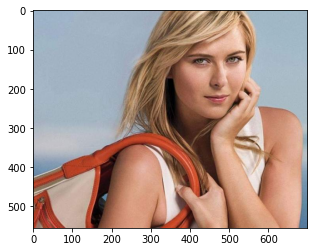

In [33]:
original_image = cv2.imread('./test_images/sharapova1.jpg')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

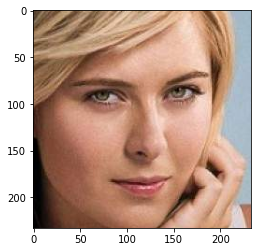

In [34]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/sharapova1.jpg')
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

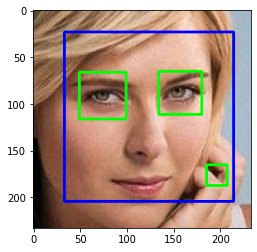

In [35]:
#Running face recognition in the cropped image
disp_rect(cropped_image) #we get 3 eyes which is ok. this is why we allow eyes>=2 in the crop function

**In below image face is not very clear and it doesn't have two eyes clearly visible**

Function returned: None


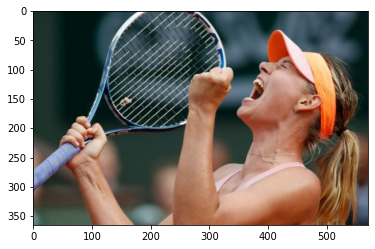

In [36]:
org_image_obstructed = cv2.imread('./test_images/sharapova2.jpg')
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/sharapova2.jpg')
print("Function returned:",cropped_image_no_2_eyes) # we get NULL in the print . because the given img cant detect 2 eyes

disp_rect(cv2.imread('./test_images/sharapova2.jpg'))  #we cant deterct any faces in this image clearly

**Above cropped_image_no_2_eyes is None which means we should ignore this image and we will not use such image for model training**

we create a new folder for storing the cropped images

In [37]:
#./ means home directory
path_to_data = "./dataset/"   #original data
path_to_cr_data = "./dataset/cropped/" #cropped data save location

In [38]:
import os
img_dirs = []
#scandir checks the files and sub-folders both. Check GFG
#but we will be dealing with subfolders only. 
#so we use the entry.is_dir(): to check whether we are at a folder or file
for entry in os.scandir(path_to_data):  #scandir will go throiugh all the subdirectiries within my dataset folder
    if entry.is_dir():  
        img_dirs.append(entry.path)  #names of those directories will be stored int hsi img_dir list variable

In [39]:
img_dirs #it looks like this . it is stoed as 'string'

['./dataset/cropped',
 './dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

# First Indexing

<h1 style="color:blue; font-size:30px;">Skip running the following 2 code blocks if manual cleaning has been done</h1>


In [ ]:
import shutil
#os.path.exists means does this 'path_to_cr_data' folder exists?

if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data) #if 'cropped' exists then i just remove the entire folder
os.mkdir(path_to_cr_data) #Now we create the folder 'cropped'

**Go through all images in dataset folder and create cropped images for them. There will be cropped folder inside dataset folder after you run this code**

In [ ]:
#we dont worry about celenbrity_name==cropped because we wont get any reutnr valeu from our crop function in that case

cropped_image_dirs = [] #contains the cropped file path for each player
celebrity_file_names_dict = {}
for img_dir in img_dirs: #go to each folder
    count = 1
    # img_dir= "./dataset/lionel_messi" is a list element of 'img_dirs' list
    celebrity_name = img_dir.split('/')[-1] #we just take the last string bcoz that will be the paleyr name
    
    celebrity_file_names_dict[celebrity_name] = [] # we need to initialise the dictionary key value with the celebrity name
    #we create a blank 'list' under that key value first and then we just append the image paths to that list 
    
    for entry in os.scandir(img_dir): #os.scandi gives a iterator for each of the file in the 'img_dir' directory(folder)
        #entry.path will have the path of the image
        roi_color = get_cropped_image_if_2_eyes(entry.path) #i want to call my functionon the path 'entry.path'
        if roi_color is not None: #if the returned function value is not none
            
            #path_to_cr_data = "./dataset/cropped/"
            cropped_folder = path_to_cr_data + celebrity_name
            #cropped_folder looks like this: "./dataset/cropped/lionel_messi"
            
            if not os.path.exists(cropped_folder):  
                os.makedirs(cropped_folder) # we just create that folder if it does not exist already 
                cropped_image_dirs.append(cropped_folder) #we store the newly created folder path in a list variable
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"  
            #lionel_messi20.png
            #we also keep a count of how many imgaes are there of the same celebrity
            cropped_file_path = cropped_folder + "/" + cropped_file_name #folderpath+/+filename
            
            cv2.imwrite(cropped_file_path, roi_color) #imwrite is used to save images
            #1st argument is the file path of where to save the image array 'roicolour' 
            
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            #key of this dictionary will be the name of the celebrity 
            #and the values corresponding to that key will be the exact image file paths
            count += 1

### Now we have cropped folder under datasets folder that contains cropped images

### Run this after after Manually examining cropped folder and deleting any unwanted images

<h1 style="color:blue; font-size:20px;">
    Second Indexing. This portion will just store the path to the cropped folder and the celebrity names
</h1>


In [40]:
cropped_image_dirs = []
for img_dir in img_dirs:
    celebrity_name = img_dir.split('/')[-1]
    #path_to_cr_data = "./dataset/cropped/"
    cropped_folder = path_to_cr_data + celebrity_name
    if celebrity_name!= "cropped":  #cropped is not a celebrity name
        cropped_image_dirs.append(cropped_folder)
        
#we need to check for celebrity_name==cropped because in our previous code,
#we used the crop function which returned 'none' when images didnt exist in the cropped folder
#so we never saved those images and those names never got into cropped_image_dirs

In [41]:
cropped_image_dirs

['./dataset/cropped/lionel_messi',
 './dataset/cropped/maria_sharapova',
 './dataset/cropped/roger_federer',
 './dataset/cropped/serena_williams',
 './dataset/cropped/virat_kohli']

In [42]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel_messi': ['./dataset/cropped/lionel_messi\\lionel_messi1.png',
  './dataset/cropped/lionel_messi\\lionel_messi10.png',
  './dataset/cropped/lionel_messi\\lionel_messi11.png',
  './dataset/cropped/lionel_messi\\lionel_messi13.png',
  './dataset/cropped/lionel_messi\\lionel_messi14.png',
  './dataset/cropped/lionel_messi\\lionel_messi15.png',
  './dataset/cropped/lionel_messi\\lionel_messi16.png',
  './dataset/cropped/lionel_messi\\lionel_messi17.png',
  './dataset/cropped/lionel_messi\\lionel_messi18.png',
  './dataset/cropped/lionel_messi\\lionel_messi19.png',
  './dataset/cropped/lionel_messi\\lionel_messi2.png',
  './dataset/cropped/lionel_messi\\lionel_messi20.png',
  './dataset/cropped/lionel_messi\\lionel_messi22.png',
  './dataset/cropped/lionel_messi\\lionel_messi23.png',
  './dataset/cropped/lionel_messi\\lionel_messi24.png',
  './dataset/cropped/lionel_messi\\lionel_messi25.png',
  './dataset/cropped/lionel_messi\\lionel_messi26.png',
  './dataset/cropped/lionel_messi\

In [43]:

class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict 
#stores the classes and the index of the class
#we assign messi as class '0' for recognition
#we know that ML wont work with string names

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

### Images in cropped folder can be used for model training. 
### We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y 

### we iterate over the training image files and concatenate the Wavelet image after the RAW image

In [44]:
X, y = [], []
#celebrity_name = key from the dictionary
#training_files= list of the 'path' of the images under that key
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files: #take each image path from the list 'training_files'
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))  
        #we need to scale all the images. We just use rezsize of opencv
        img_har = w2d(img,'db1',5) #this is the wavelet transformed image
        scalled_img_har = cv2.resize(img_har, (32, 32)) #scale the wavelet image
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        #we vertically stack both the images. first we reshape them into (32*32*3,1) for RAW image
        #we basically just flatten the entire 3D matrix into a single vector
        #and then we take the black/white wavelet image too and combine into a single vector
        X.append(combined_img) 
        #X is a python list . and we just append a numpy array to that
        y.append(class_dict[celebrity_name])     

In [45]:
len(X[0]) #we check the legth of the 1st image(1st data sample)

4096

In [46]:
32*32*3 + 32*32  # we verify that the RAW image was 32x32x3 and the wavelt was 32x32

4096

In [47]:
print(X[0])
print("X is: ",type(X) , "Each element of X is: ",type(X[0]))
#X is a list of numpy array

[[100]
 [129]
 [140]
 ...
 [237]
 [234]
 [232]]
X is:  <class 'list'> Each element of X is:  <class 'numpy.ndarray'>


In [48]:
y[:5] #first 5 elements . these represent the class of the first 5 persons.
#all 0s indicate the first 5 images are of messi 

[0, 0, 0, 0, 0]

## Training set size

In [49]:
#we convert the X into a numpy array
#we convert each value into float to avoid sklearn warnings
X = np.array(X).reshape(len(X),4096).astype(float) 
X.shape # we can get the shape of a numpy array . but we cant do this for list
#we see that there are 168 examples now

(168, 4096)

### Data cleaning process is done. Now we are ready to train our model

We will use SVM with rbf kernel tuned  with heuristic finetuning

In [50]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [51]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)
#1st step: scaling: ('scaler', StandardScaler())
#we scale the inputs using a standard scaler. we could also use min-max scaler 
#2nd step: Create SVM with random hyperparameters: ('svc', SVC(kernel = 'rbf', C = 10))
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])  #pipeline is a scklearn function
pipe.fit(X_train, y_train)
print("Train Set Accuracy: ",pipe.score(X_train, y_train)*100)
print("Test Set Accuracy: ",pipe.score(X_test, y_test)*100)

#88% accuracy with random hyper-parameter is good
print("Number of training samples: ",len(X_train)," out of total samples: ",len(X))

Train Set Accuracy:  100.0
Test Set Accuracy:  90.47619047619048
Number of training samples:  126  out of total samples:  168


In [52]:
print(classification_report(y_test, pipe.predict(X_test)))
#0 to 4 are our different classes

              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.90      1.00      0.95         9
           2       1.00      0.88      0.93         8
           3       0.75      0.86      0.80         7
           4       0.90      1.00      0.95         9

    accuracy                           0.90        42
   macro avg       0.91      0.90      0.90        42
weighted avg       0.92      0.90      0.90        42



### Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [53]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [54]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000], #different values for the same hyperparameter
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10] #we will try different values for the estimatr
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

### gridsearch uses validation set for hyper-tuning hyperparamters
<br> gridsearch automatically splits datainto training , validation set. and then uses the validation set to search for the best paramater
<br>and then finally to choose the best model and test the performance of the models i use X_Test (test set)

In [55]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model']) #create a sklearn pipleline and to add the input scaler
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False) 
    #cv=5 means 5-cross folds. it makes 5 folds of the given total data set
    #then uses 1 fold for test(cross-validation) and rest for training
    #we bascially take the average accuracy over 5 folds
    #5-folds means in the 1st iteration 1 to 80 for train. then 20 test 
    clf.fit(X_train, y_train)
    #append the clf.best_score to the score[] list initialsied above
    #the best score is after trying a model with all the mentioned hyperparameter trial values in the gridsearcv dictionary
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.849231,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.659385,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.873231,{'logisticregression__C': 1}


In [56]:
best_estimators #this is actually a trained model which is the best model after searhing using gridsearch
#this is dictionary of pipelines

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

### How to choose the best model?
gridsearch automatically splits datainto training , validation set. and then uses the validation set to search for the best paramatei
<br>Finally to choose the best model and test the performance of the models I use X_Test (test set)
<br> this is the first time till now that we are  **X_Test**

In [57]:
#best_estimators['svm'] gives the pipeline trained model. 
#we just use it to find the score on the X_TEST and use y_test to find the score after prediction
best_estimators['svm'].score(X_test,y_test)

0.8809523809523809

In [58]:
best_estimators['random_forest'].score(X_test,y_test)

0.7619047619047619

In [59]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9285714285714286

### How to choose between the models?
We saw that in the k-fold corss validation , the SVM performed the best(83>81). but now in the X_Test test set the logistic performs best(92>90). 
<br>In my opinion , since the SVM performed good on 5 different cross-val sets in the k-fold so SVM must perform better in general. 
<br>Some people might say that the logistic regression must be choosen because it performs better on test set which shows how the real world data is. But I will choose SVM because it performs well enough(90%) in the test set also. And SVM is good in classification problems

In [60]:
#we choose the SVM as the best classifier best_clf
best_clf = best_estimators['svm']

We just test the trained model for a image

./dataset/cropped/lionel_messi\lionel_messi1.png


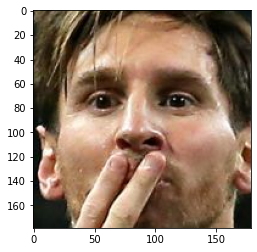

In [61]:
print(celebrity_file_names_dict['lionel_messi'][0])
img = cv2.imread(celebrity_file_names_dict['lionel_messi'][0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[7, 0, 0, 1, 1],
       [0, 9, 0, 0, 0],
       [0, 1, 7, 0, 0],
       [0, 2, 0, 5, 0],
       [0, 0, 0, 0, 9]], dtype=int64)

Text(69.0, 0.5, 'Truth')

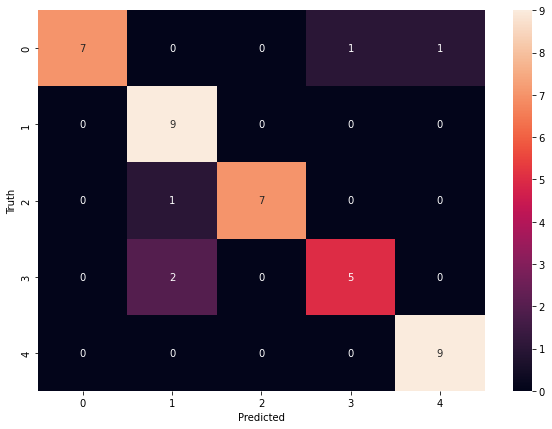

In [63]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [64]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

y-axis: truth, x-axis: predicted.
<br> the class 0 has '7' in the truth value '0' in the top corner. it means 7 times model predicted messi among all the images and the actual image on which the model predicted , was of messi only. and for other truth values in predicted class=0 , it predicted 0. it means for messi mode did not make mistakes

### Save the trained model

In [65]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 
# joblib.dump(best_clf, './server/artifacts/saved_model.pkl') 

['saved_model.pkl']

### Save class dictionary

In [66]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))
    
# with open("./server/artifacts/class_dictionary.json","w") as f:
#     f.write(json.dumps(class_dict))
